In [ ]:
import os
folder_path = "split_data/train"
for dirpath, dirnames, filenames in os.walk(folder_path):
    for file_name in filenames:
        print(dirpath+"/"+file_name)

# Normal

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
# Load the image file
image_path = 'split_data/train/2/9873823L.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels for a cleaner look
plt.show()


# Image Normalization:

- Normalize the pixel values to a common range, such as 0 to 1 or -1 to 1, to ensure that all features have a similar scale.

In [ ]:
import numpy as np

def normalize_image(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

normalised_img = normalize_image(img)
plt.imshow(normalised_img)
plt.axis('off')  # Turn off axis labels for a cleaner look
plt.show()

# Resizing:

- Resize the input images to a consistent size to ensure that all images have the same dimensions. This is important for feeding the images into a neural network.

In [ ]:
from PIL import Image

def resize_image(image, target_size):
    return np.array(Image.fromarray(image).resize(target_size))

resized_img = resize_image(normalised_img,(256,256))
plt.imshow(resized_img)
plt.axis('off')
plt.show()

# Histogram Equalization:

- Apply histogram equalization to enhance the contrast of the images, which can help the model better distinguish the relevant features.

In [ ]:
import cv2
def equalize_histogram(image):
    return cv2.equalizeHist(image)

# Apply equalization and display the image
equalized_img = equalize_histogram(img)
plt.imshow(equalized_img)
plt.axis('off')
plt.show()

# Combination

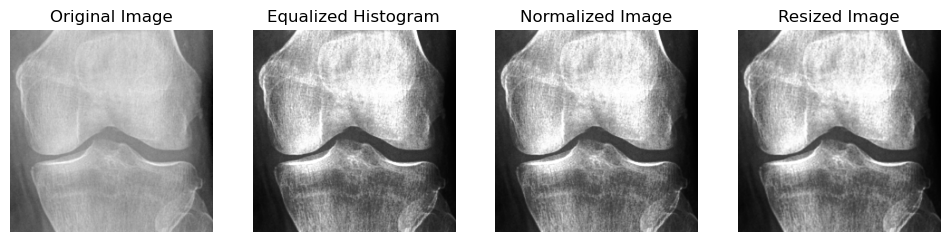

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

class ImagePreprocessor:
    def __init__(self, image_path):
        self.image_path = image_path
        self.original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    def equalize_histogram(self):
        self.equalized_img = cv2.equalizeHist(self.original_img)
        return self.equalized_img

    def normalize_image(self, image):
        normalized_img = (image - np.min(image)) / (np.max(image) - np.min(image))
        return normalized_img

    def resize_image(self, image, target_size):
        resized_img = np.array(Image.fromarray((image * 255).astype(np.uint8)).resize(target_size))
        return resized_img

    def process_and_display(self):
        # Perform all preprocessing steps
        equalized_img = self.equalize_histogram()
        normalized_img = self.normalize_image(equalized_img)
        resized_img = self.resize_image(normalized_img, (256, 256))

        # Plot the images with headings
        images = [self.original_img, equalized_img, normalized_img, resized_img]
        titles = ['Original Image', 'Equalized Histogram', 'Normalized Image', 'Resized Image']

        plt.figure(figsize=(12, 4))
        for i, (img, title) in enumerate(zip(images, titles)):
            plt.subplot(1, 4, i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(title)
            plt.axis('off')
        
        plt.show()

        return resized_img

# Usage
image_path = 'split_data/train/2/9873823L.png'
preprocessor = ImagePreprocessor(image_path)
final_image = preprocessor.process_and_display()

In [2]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import torch

def process_dataset(dataset_dir):
    X = []
    y = []

    # Count total files for progress bar
    total_files = sum(len(files) for _, _, files in os.walk(dataset_dir))

    with tqdm(total=total_files, unit="images", desc="Preprocessing dataset") as pbar:
        for dirname, _, filenames in os.walk(dataset_dir):
            
            # Check if directory name is numeric, indicating a label folder
            if os.path.basename(dirname).isdigit():
                label = int(os.path.basename(dirname))  # Folder name as the label

                for filename in filenames:
                    image_path = os.path.join(dirname, filename)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                    # Initialize preprocessor with the image path
                    preprocessor = ImagePreprocessor(image_path)
                    equalized_image = preprocessor.equalize_histogram()
                    normalized_image = preprocessor.normalize_image(equalized_image)
                    resized_image = preprocessor.resize_image(normalized_image, (256, 256))

                    X.append(resized_image)
                    y.append(label)

                    pbar.update(1)
        # Convert lists to NumPy arrays first
        X_array = np.array(X)  # Convert to NumPy array
        y_array = np.array(y)
        # Convert lists to PyTorch tensors
        X_tensor = torch.tensor(X_array).float()  # Convert to float tensor
        y_tensor = torch.tensor(y_array).long()   # Convert to long tensor for labels
    return X_tensor, y_tensor

# Usage
dataset_dir = "split_data/train/"
X_train, y_train = process_dataset(dataset_dir)

Preprocessing dataset: 100%|██████████| 5806/5806 [00:07<00:00, 756.08images/s]


In [3]:
dataset_dir = "split_data/test/"
X_test, y_test = process_dataset(dataset_dir)

Preprocessing dataset: 100%|██████████| 1526/1526 [00:02<00:00, 758.25images/s]


In [4]:
dataset_dir = "split_data/val/"
X_val, y_val = process_dataset(dataset_dir)

Preprocessing dataset: 100%|██████████| 1452/1452 [00:01<00:00, 759.97images/s]


In [5]:
print("Unique labels in y:", np.unique(y_train))

Unique labels in y: [0 1 2 3 4]


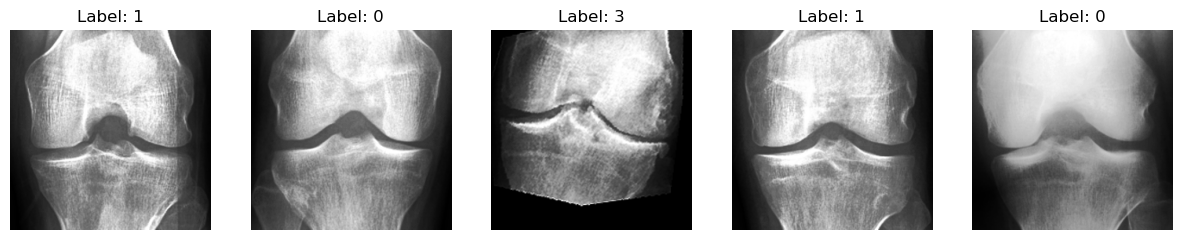

In [6]:
import matplotlib.pyplot as plt

# Plot random images with labels to check preprocessing
num_samples = 5
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    idx = np.random.randint(0, len(X_train))
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')
plt.show()
